In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm

from scipy import stats
from scipy.special import expit as logistic

In [2]:
%config InlineBackend.figure_format = 'retina'
RANDOM_SEED = 8927
np.random.seed(RANDOM_SEED)
az.style.use("arviz-darkgrid")
az.rcParams["stats.credible_interval"] = 0.89
az.rcParams["stats.ic_scale"] = "deviance"
az.rcParams["stats.information_criterion"] = "waic"

#### Code 13.1

In [3]:
d = pd.read_csv("Data/reedfrogs.csv", sep=",")
print(d.shape)
d.head(8)

(48, 5)


,density,pred,size,surv,propsurv
0,10,no,big,9,0.9
1,10,no,big,10,1.0
2,10,no,big,7,0.7
3,10,no,big,10,1.0
4,10,no,small,9,0.9
5,10,no,small,9,0.9
6,10,no,small,10,1.0
7,10,no,small,9,0.9


#### Code 13.2

In [4]:
# make the tank cluster variable
tank = np.arange(d.shape[0])
n_tanks = d.shape[0]

# fit
with pm.Model() as m_13_1:
    a = pm.Normal("a", 0, 1.5, shape=n_tanks)
    p = pm.math.invlogit(a[tank])

    S = pm.Binomial("S", n=d.density, p=p, observed=d.surv)
    trace_13_1 = pm.sample(random_seed=RANDOM_SEED)

az.summary(trace_13_1, round_to=2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.


,mean,sd,hpd_5.5%,hpd_94.5%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
a[0],1.72,0.77,0.52,2.92,0.01,0.01,7463.36,4809.00,8019.76,3067.67,1.0
a[1],2.42,0.91,1.01,3.82,0.01,0.01,7118.40,4581.87,8062.68,2560.20,1.0
a[2],0.74,0.63,-0.26,1.77,0.01,0.01,11206.05,3454.90,11200.82,2487.93,1.0
a[3],2.40,0.90,0.97,3.82,0.01,0.01,7704.97,4887.20,8592.77,2795.19,1.0
a[4],1.72,0.78,0.43,2.89,0.01,0.01,7576.99,3969.26,8496.81,2758.73,1.0
a[5],1.72,0.76,0.48,2.92,0.01,0.01,8468.17,4973.55,9262.94,2773.92,1.0
a[6],2.39,0.87,1.00,3.69,0.01,0.01,7557.93,5029.16,8446.53,2882.58,1.0
a[7],1.74,0.79,0.51,2.95,0.01,0.01,7347.87,4330.34,8145.43,2571.23,1.0
a[8],-0.36,0.63,-1.38,0.61,0.01,0.01,9624.90,2070.12,9682.56,2808.26,1.0
a[9],1.71,0.77,0.52,2.92,0.01,0.01,9299.30,5242.11,9717.30,2662.66,1.0


#### Code 13.3

In [5]:
with pm.Model() as m_13_2:
    a_bar = pm.Normal("a_bar", 0.0, 1.5)
    sigma = pm.Exponential("sigma", 1.0)

    a = pm.Normal("a", a_bar, sigma, shape=n_tanks)
    p = pm.math.invlogit(a[tank])

    S = pm.Binomial("S", n=d.density, p=p, observed=d.surv)
    trace_13_2 = pm.sample(random_seed=RANDOM_SEED)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a, sigma, a_bar]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.


#### Code 13.4

In [6]:
az.compare({"m13_1": trace_13_1, "m13_2": trace_13_2})

/Users/alex_andorra/opt/anaconda3/envs/stat-rethink-pymc3/lib/python3.7/site-packages/arviz/stats/stats.py:1320: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  "For one or more samples the posterior variance of the log predictive "


,rank,waic,p_waic,d_waic,weight,se,dse,warning,waic_scale
m13_2,0,200.6,21.1799,0,0.995492,4.7698,0,True,deviance
m13_1,1,214.438,25.4826,13.8378,0.00450823,7.52705,3.6187,True,deviance


#### Code 13.5

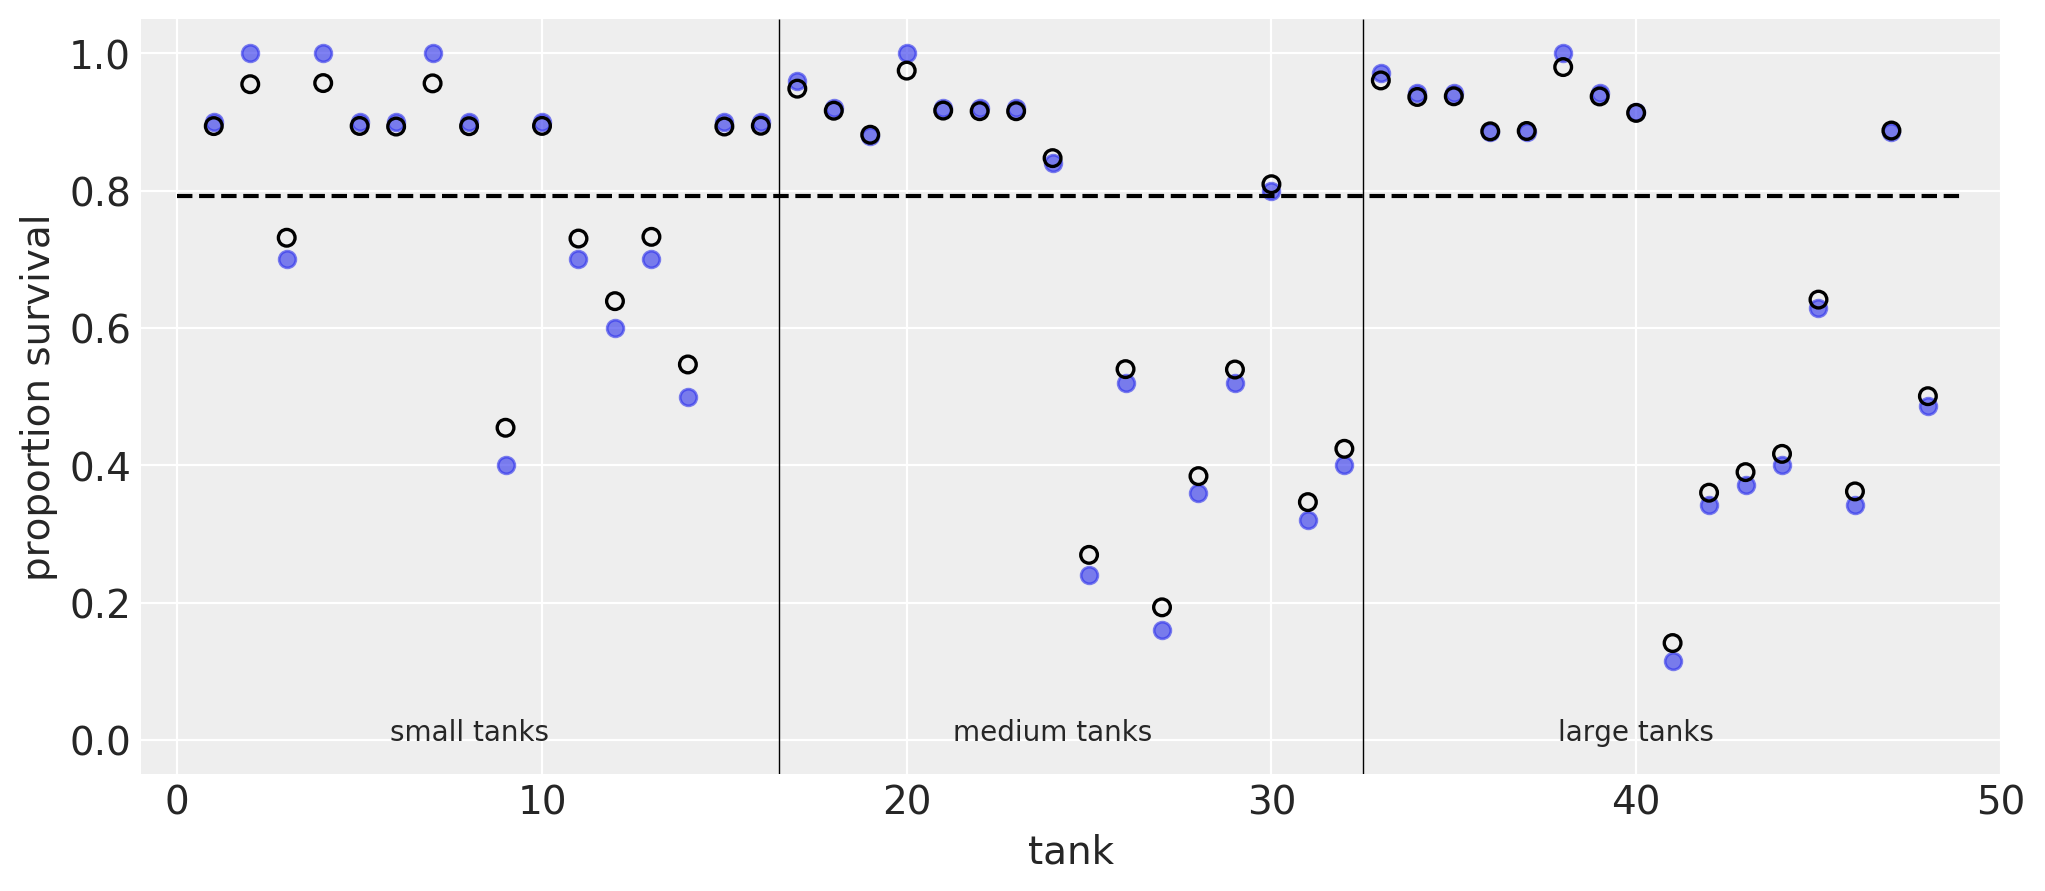

In [7]:
# compute mean intercept for each tank
# also transform to probability with logistic
propsurv_est = logistic(trace_13_2["a"].mean(0))

_, ax = plt.subplots(1, 1, figsize=(12, 5))

# display raw proportions surviving in each tank
ax.scatter(np.arange(1, 49), d.propsurv, alpha=0.6)

# overlay posterior means
ax.scatter(np.arange(1, 49), propsurv_est, facecolors="none", edgecolors="k", lw=1.2)

# mark posterior mean probability across tanks
ax.hlines(logistic(trace_13_2["a_bar"].mean()), 0, 49, linestyles="--")

# draw vertical dividers between tank densities
ax.vlines([16.5, 32.5], -0.05, 1.05, lw=0.5)
ax.text(8, 0, "small tanks", horizontalalignment="center")
ax.text(16 + 8, 0, "medium tanks", horizontalalignment="center")
ax.text(32 + 8, 0, "large tanks", horizontalalignment="center")

ax.set_xlabel("tank", fontsize=14)
ax.set_ylabel("proportion survival", fontsize=14)
ax.set_xlim(-1, 50)
ax.set_ylim(-0.05, 1.05);

#### Code 13.6

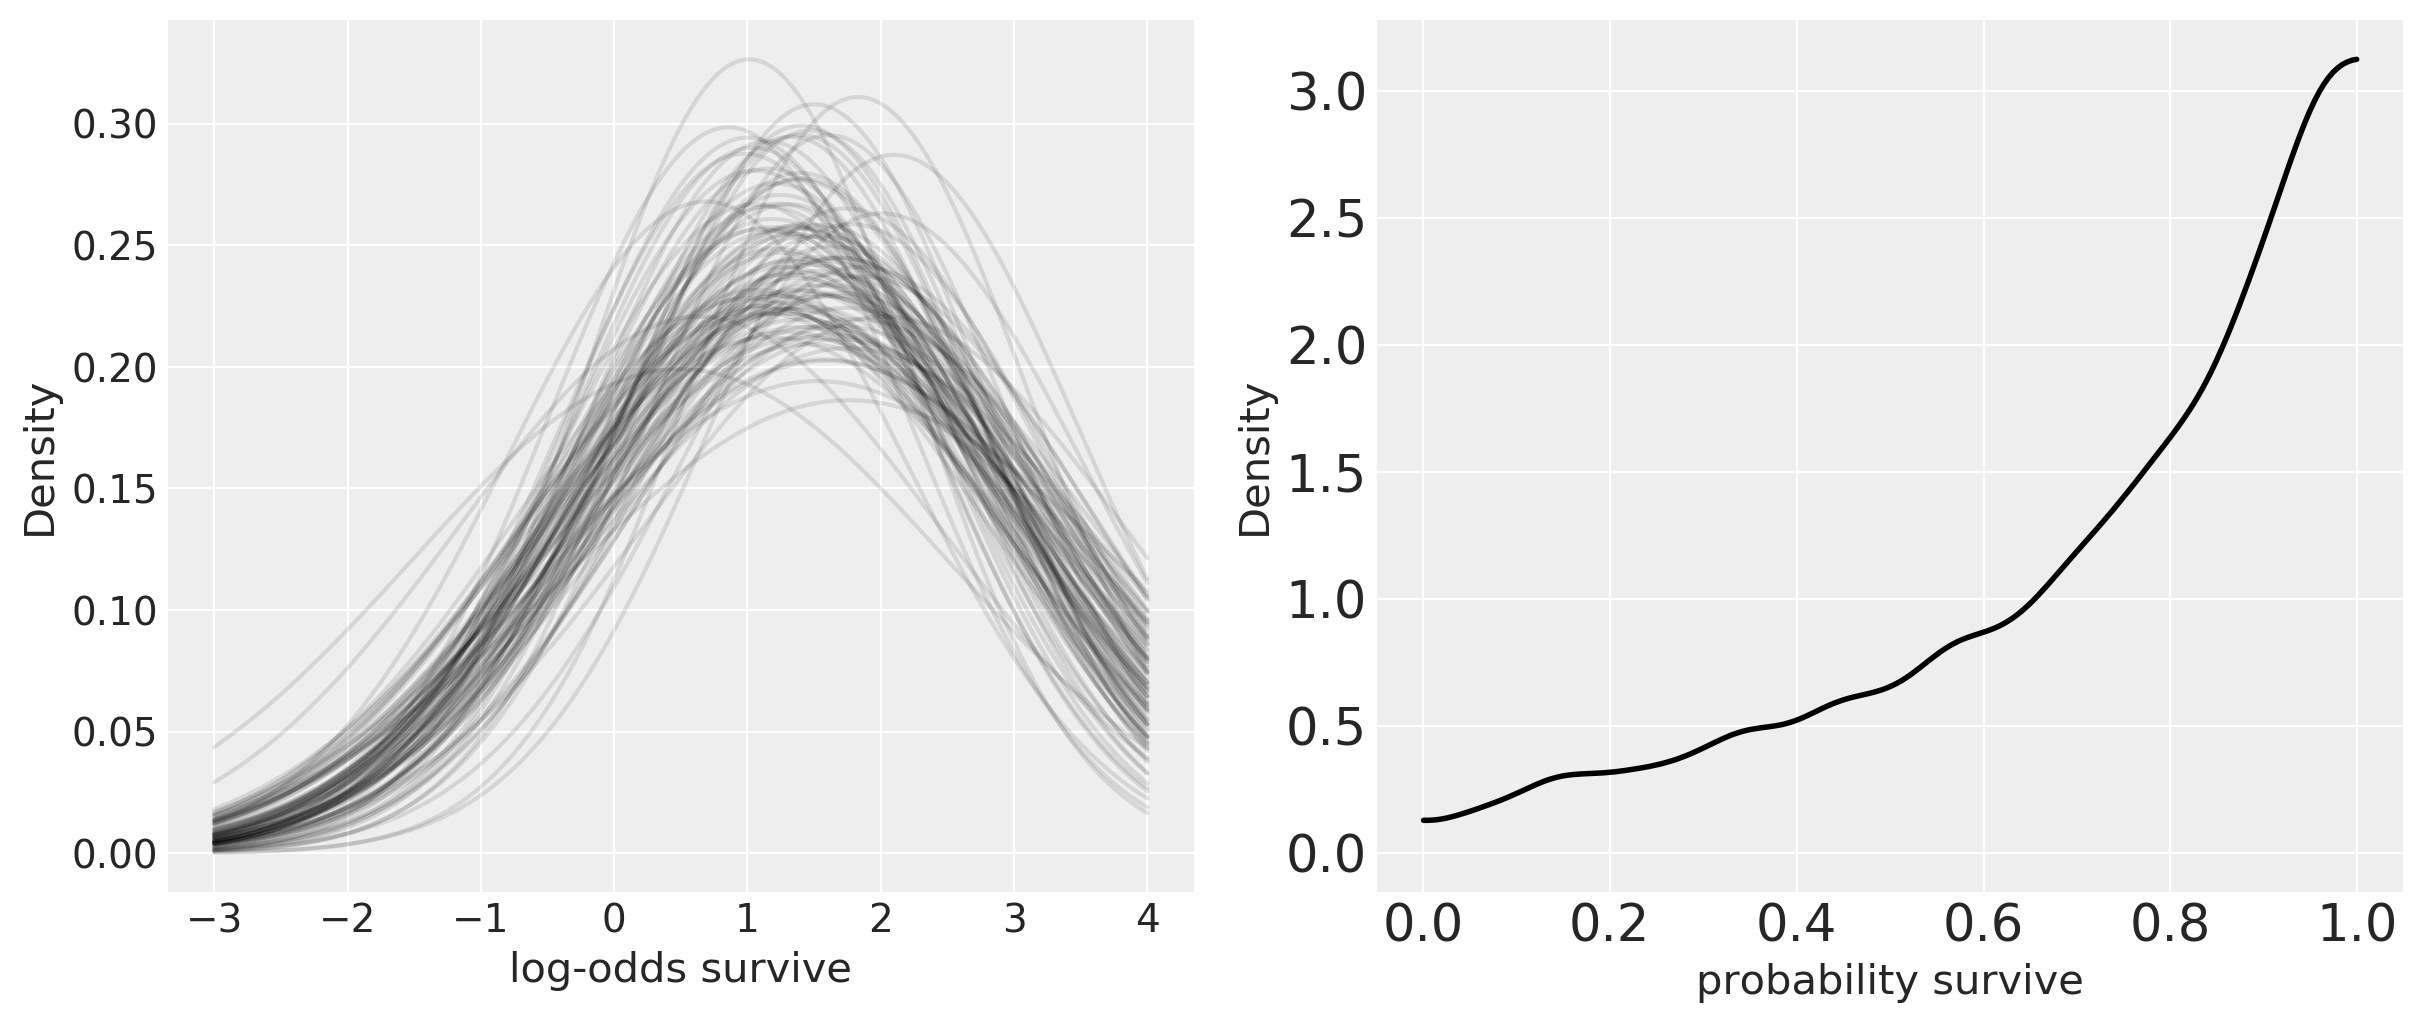

In [8]:
_, ax = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True)

# show first 100 populations in the posterior
xrange = np.linspace(-3, 4, 200)
postcurve = [
    stats.norm.pdf(xrange, loc=trace_13_2["a_bar"][i], scale=trace_13_2["sigma"][i])
    for i in range(100)
]
ax[0].plot(xrange, np.asarray(postcurve).T, alpha=0.1, color="k")
ax[0].set_xlabel("log-odds survive")
ax[0].set_ylabel("Density")

# sample 8000 imaginary tanks from the posterior distribution
sim_tanks = np.random.normal(loc=trace_13_2["a_bar"], scale=trace_13_2["sigma"])

# transform to probability and visualize
az.plot_kde(logistic(sim_tanks), ax=ax[1], plot_kwargs={"color": "k"})
ax[1].set_xlabel("probability survive")
ax[1].set_ylabel("Density");

#### Code 13.7

In [9]:
a_bar, sigma, nponds = 1.5, 1.5, 60
Ni = np.repeat([5, 10, 25, 35], 15)

#### Code 13.8

In [10]:
a_pond = np.random.normal(loc=a_bar, scale=sigma, size=nponds)

#### Code 13.9

In [11]:
dsim = pd.DataFrame(dict(pond=np.arange(nponds), Ni=Ni, true_a=a_pond))
dsim.head()

,pond,Ni,true_a
0,0,5,2.171878
1,1,5,-0.355311
2,2,5,2.992474
3,3,5,2.133112
4,4,5,0.401375


#### Code 13.10
Data types related. Python is dynamically-typed.

#### Code 13.11

In [12]:
dsim["Si"] = np.random.binomial(dsim["Ni"], logistic(dsim["true_a"]))

#### Code 13.12

In [13]:
dsim["p_nopool"] = dsim.Si / dsim.Ni

#### Code 13.13

In [14]:
with pm.Model() as m_13_3:
    a_bar = pm.Normal("a_bar", 0.0, 1.5)
    sigma = pm.Exponential("sigma", 1.0)

    a_pond = pm.Normal("a_pond", a_bar, sigma, shape=nponds)
    p = pm.math.invlogit(a_pond[dsim.pond.values])

    Si = pm.Binomial("Si", n=dsim.Ni.values, p=p, observed=dsim.Si)
    trace_13_3 = pm.sample(random_seed=RANDOM_SEED)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a_pond, sigma, a_bar]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.


#### Code 13.14

In [15]:
az.summary(trace_13_3, var_names=["a_bar", "sigma"], round_to=2)

,mean,sd,hpd_5.5%,hpd_94.5%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
a_bar,1.51,0.21,1.17,1.86,0.0,0.0,3968.14,3783.14,3998.70,3244.93,1.0
sigma,1.42,0.20,1.13,1.76,0.0,0.0,1688.99,1688.99,1701.77,2323.98,1.0


#### Code 13.15

In [16]:
dsim["p_partpool"] = logistic(trace_13_3["a_pond"].mean(0))

#### Code 13.16

In [17]:
dsim["p_true"] = logistic(dsim["true_a"].values)

#### Code 13.17

In [18]:
nopool_error = np.abs(dsim.p_nopool - dsim.p_true)
partpool_error = np.abs(dsim.p_partpool - dsim.p_true)

#### Code 13.18 and 13.19

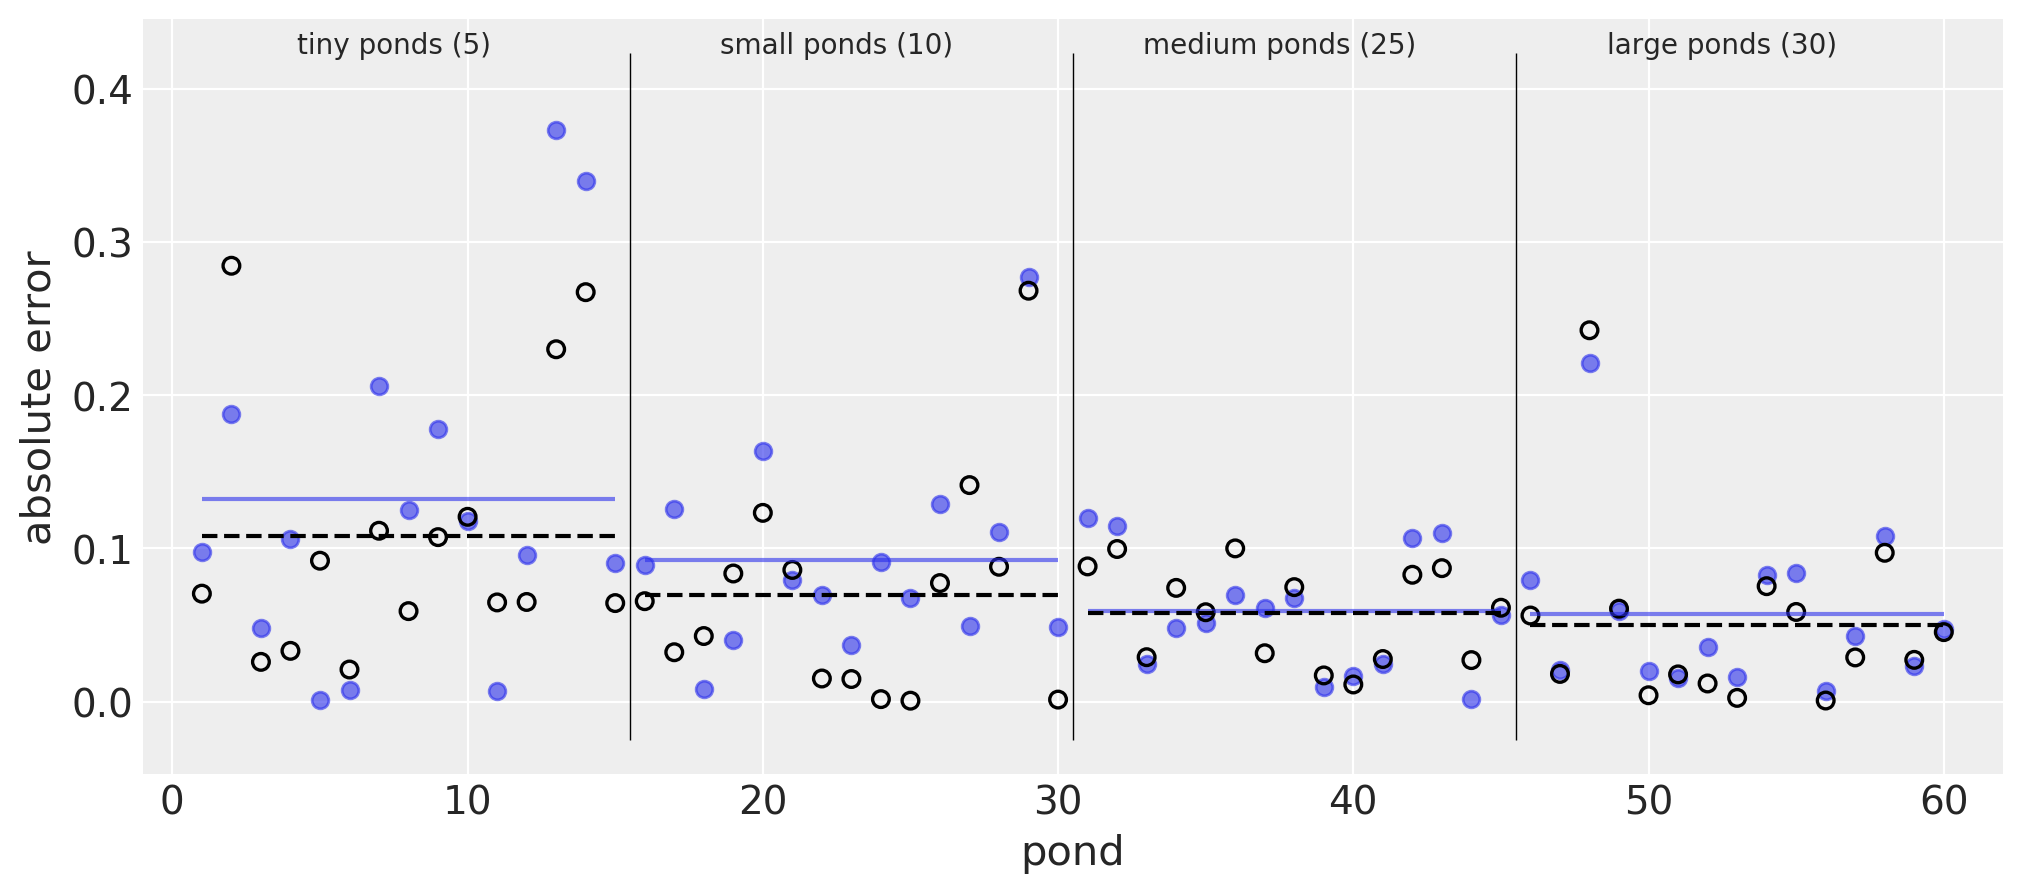

In [19]:
_, ax = plt.subplots(1, 1, figsize=(12, 5))
xrange = np.arange(60)
xrange_ = xrange.reshape((4, 15))

ax.scatter(xrange + 1, nopool_error, alpha=0.6)
ax.scatter(xrange + 1, partpool_error, facecolors="none", edgecolors="k", lw=1.2)
ax.vlines(xrange_[1:, 0] + 0.5, -0.025, max(nopool_error) + 0.05, lw=0.5)

textall = [
    "tiny ponds (5)",
    "small ponds (10)",
    "medium ponds (25)",
    "large ponds (30)",
]
for isem in range(4):
    ax.hlines(
        nopool_error[xrange_[isem, :]].mean(),
        xrange_[isem, 0] + 1,
        xrange_[isem, -1] + 1,
        color="C0",
        alpha=0.6,
    )
    ax.hlines(
        partpool_error[xrange_[isem, :]].mean(),
        xrange_[isem, 0] + 1,
        xrange_[isem, -1] + 1,
        color="k",
        linestyles="--",
    )
    ax.text(
        xrange_[isem, 7] + 0.5,
        max(nopool_error) + 0.05,
        textall[isem],
        horizontalalignment="center",
    )

ax.set_xlabel("pond")
ax.set_ylabel("absolute error")
ax.set_xlim(-1, 62);

#### Code 13.20

This part is Stan related. To do the same in PyMC3 (i.e., avoid compiling the same model twice), you need to set up the input data with `pm.Data`. There are examples in this repository, and you can also take a look at [this tutorial](https://docs.pymc.io/notebooks/data_container.html)

#### Code 13.21

In [20]:
d = pd.read_csv("Data/chimpanzees.csv", sep=";")

treatment = (d.prosoc_left + 2 * d.condition).values
Ntreatments = len(np.unique(treatment))

actor = (d.actor - 1).astype(int).values
Nactor = len(np.unique(actor))

block = (d.block - 1).astype(int).values
Nblock = len(np.unique(block))

with pm.Model() as m_13_4:
    # hyper-priors
    a_bar = pm.Normal("a_bar", 0.0, 1.5)
    sigma_a = pm.Exponential("sigma_a", 1.0)
    sigma_g = pm.Exponential("sigma_g", 1.0)

    # adaptive priors
    a = pm.Normal("a", a_bar, sigma_a, shape=Nactor)
    g = pm.Normal("g", 0.0, sigma_g, shape=Nblock)

    b = pm.Normal("b", 0.0, 0.5, shape=Ntreatments)
    p = pm.math.invlogit(a[actor] + g[block] + b[treatment])
    pulled_left = pm.Binomial("pulled_left", 1, p, observed=d.pulled_left)

    trace_13_4 = pm.sample(tune=3000, target_accept=0.95, random_seed=RANDOM_SEED)
    idata_13_4 = az.from_pymc3(trace_13_4)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [b, g, a, sigma_g, sigma_a, a_bar]


Sampling 4 chains for 3_000 tune and 1_000 draw iterations (12_000 + 4_000 draws total) took 22 seconds.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.9011254649531759, but should be close to 0.95. Try to increase the number of tuning steps.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 10% for some parameters.


#### Code 13.22

In [21]:
az.summary(idata_13_4, round_to=2)

,mean,sd,hpd_5.5%,hpd_94.5%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
a_bar,0.61,0.73,-0.56,1.74,0.02,0.01,1487.34,1487.34,1440.20,2154.06,1.00
a[0],-0.34,0.35,-0.91,0.20,0.01,0.01,1124.27,1124.27,1124.65,1795.98,1.00
a[1],4.72,1.32,2.87,6.60,0.04,0.03,1217.89,1107.96,1504.15,1253.72,1.00
a[2],-0.64,0.36,-1.23,-0.11,0.01,0.01,1129.29,1129.29,1136.58,1691.75,1.00
a[3],-0.64,0.36,-1.21,-0.06,0.01,0.01,1002.19,1002.19,995.10,1983.85,1.00
a[4],-0.34,0.36,-0.87,0.26,0.01,0.01,1074.80,1074.80,1072.57,2104.52,1.00
a[5],0.60,0.36,0.03,1.15,0.01,0.01,1093.27,1093.27,1093.82,1782.13,1.00
a[6],2.13,0.44,1.46,2.84,0.01,0.01,1489.88,1489.88,1488.86,2142.14,1.00
g[0],-0.16,0.22,-0.49,0.13,0.01,0.01,930.54,846.84,1068.90,1693.56,1.00
g[1],0.04,0.18,-0.23,0.31,0.00,0.00,1733.16,847.02,2321.42,1291.49,1.00


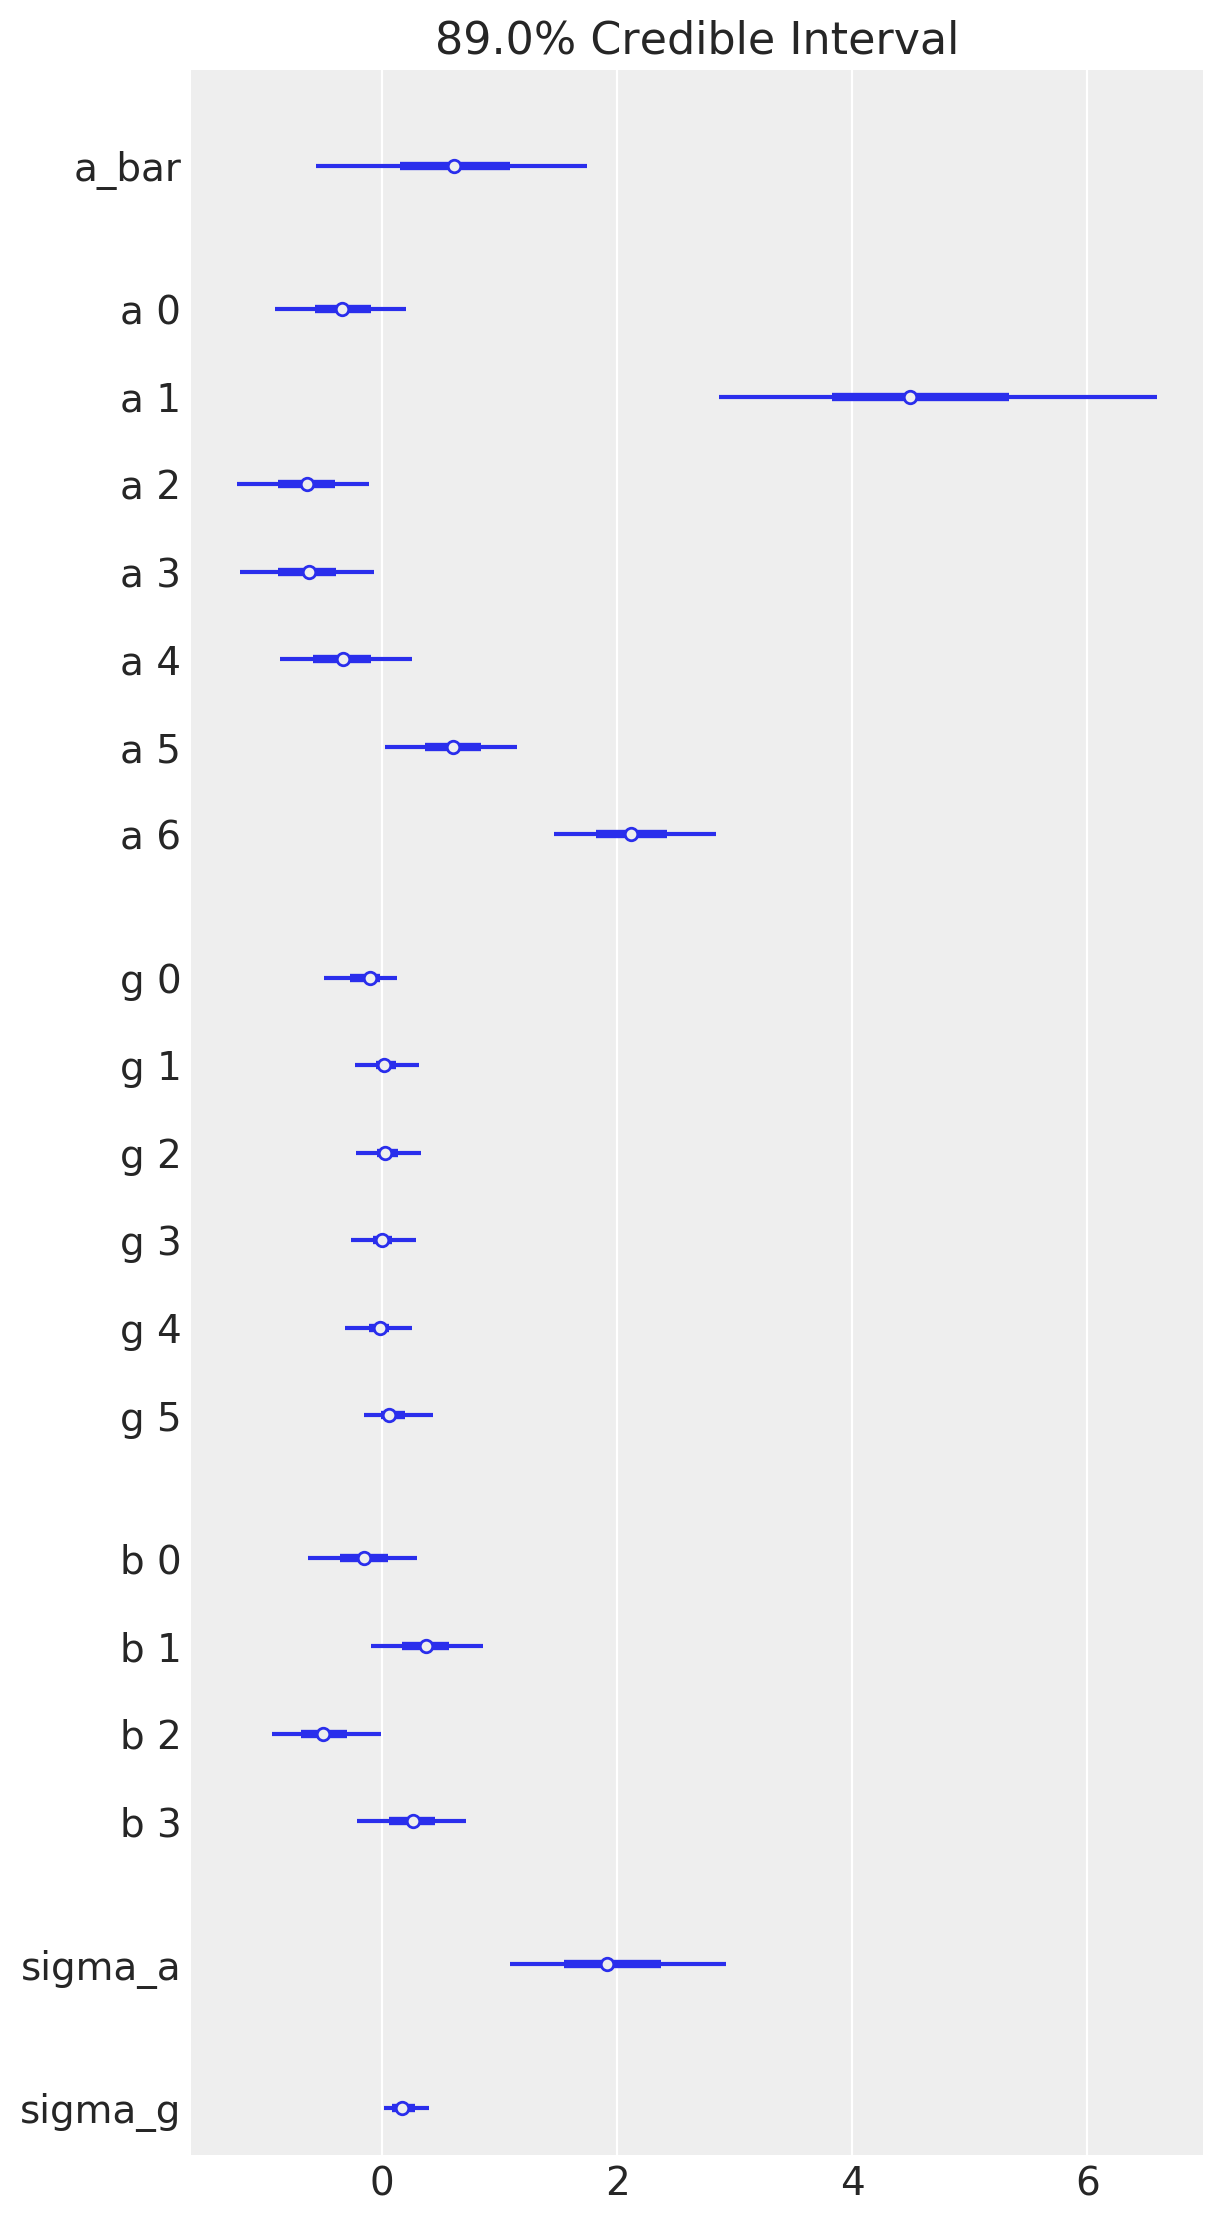

In [22]:
az.plot_forest(idata_13_4, combined=True);

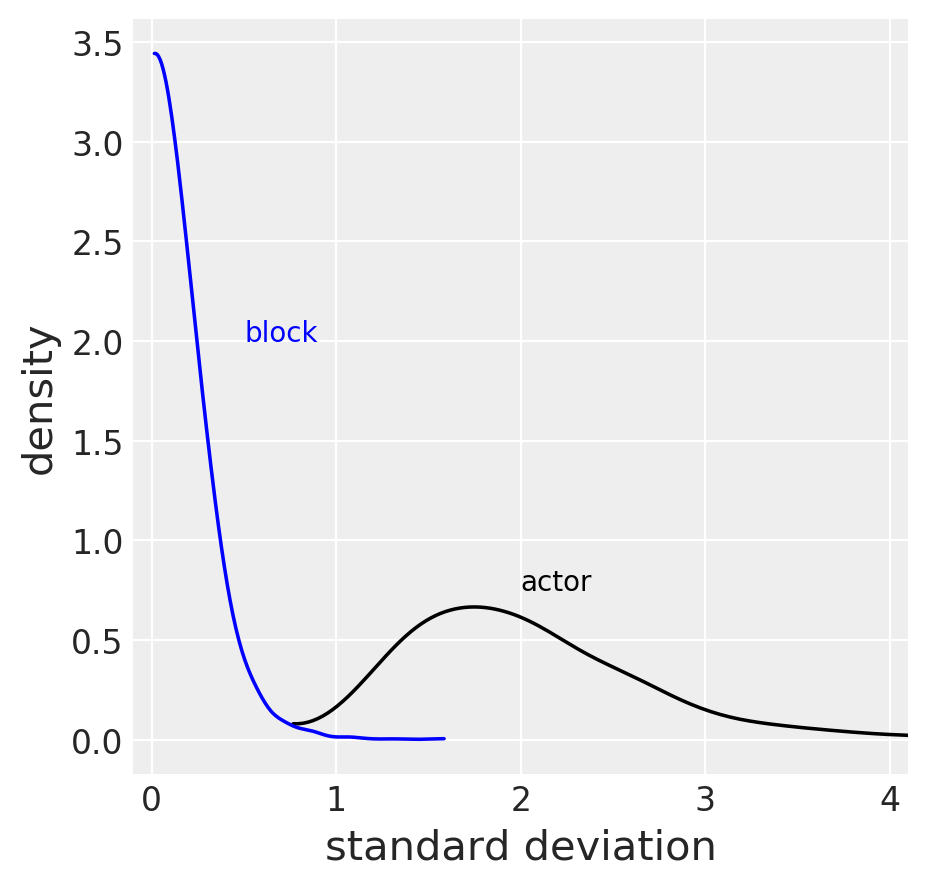

In [23]:
_, ax = plt.subplots(1, 1, figsize=(5, 5))

az.plot_kde(idata_13_4.posterior["sigma_a"], ax=ax, plot_kwargs={"color": "black"})
az.plot_kde(idata_13_4.posterior["sigma_g"], ax=ax, plot_kwargs={"color": "blue"})

ax.text(2, 0.75, "actor", color="black")
ax.text(0.5, 2, "block", color="blue")
ax.set_xlabel("standard deviation")
ax.set_ylabel("density")
ax.set_xlim(-0.1, 4.1);

#### Code 13.23

In [24]:
with pm.Model() as m_13_5:
    a_bar = pm.Normal("a_bar", 0.0, 1.5)
    sigma_a = pm.Exponential("sigma_a", 1.0)

    a = pm.Normal("a", a_bar, sigma_a, shape=Nactor)
    b = pm.Normal("b", 0.0, 0.5, shape=Ntreatments)

    p = pm.math.invlogit(a[actor] + b[treatment])
    pulled_left = pm.Binomial("pulled_left", 1, p, observed=d.pulled_left)

    trace_13_5 = pm.sample(random_seed=RANDOM_SEED)
    idata_13_5 = az.from_pymc3(trace_13_5)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [b, a, sigma_a, a_bar]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.
There were 97 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6908008384246643, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.


#### Code 13.24

In [25]:
az.compare({"m_13_4": idata_13_4, "m_13_5": idata_13_5})

,rank,waic,p_waic,d_waic,weight,se,dse,warning,waic_scale
m_13_5,0,530.863,8.43221,0,0.672904,18.3992,0,False,deviance
m_13_4,1,532.449,10.7065,1.58552,0.327096,18.393,1.61278,False,deviance


#### Code 13.25

In [26]:
with pm.Model() as m_13_6:
    a_bar = pm.Normal("a_bar", 0.0, 1.5)
    sigma_a = pm.Exponential("sigma_a", 1.0)
    sigma_g = pm.Exponential("sigma_g", 1.0)
    sigma_b = pm.Exponential("sigma_b", 1.0)

    a = pm.Normal("a", a_bar, sigma_a, shape=Nactor)
    g = pm.Normal("g", 0.0, sigma_g, shape=Nblock)
    b = pm.Normal("b", 0.0, sigma_b, shape=Ntreatments)

    p = pm.math.invlogit(a[actor] + g[block] + b[treatment])
    pulled_left = pm.Binomial("pulled_left", 1, p, observed=d.pulled_left)

    trace_13_6 = pm.sample(tune=2000, target_accept=0.95, random_seed=RANDOM_SEED)
    idata_13_6 = az.from_pymc3(trace_13_6)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [b, g, a, sigma_b, sigma_g, sigma_a, a_bar]


Sampling 4 chains for 2_000 tune and 1_000 draw iterations (8_000 + 4_000 draws total) took 21 seconds.
There were 9 divergences after tuning. Increase `target_accept` or reparameterize.
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 10% for some parameters.


In [27]:
m13_4 = az.summary(idata_13_4, var_names=["b"], kind="stats", round_to=2)["mean"]
m13_4.name = "m13_4"
m13_6 = az.summary(idata_13_6, var_names=["b"], kind="stats", round_to=2)["mean"]
m13_6.name = "m13_6"
pd.concat([m13_4, m13_6], axis=1)

,m13_4,m13_6
b[0],-0.15,-0.12
b[1],0.38,0.36
b[2],-0.50,-0.44
b[3],0.26,0.26


#### Code 13.26

In [28]:
with pm.Model() as m_13_7:
    v = pm.Normal("v", 0.0, 3.0)
    x = pm.Normal("x", 0.0, pm.math.exp(v))

    trace_13_7 = pm.sample(random_seed=RANDOM_SEED)
    idata_13_7 = az.from_pymc3(trace_13_7)
az.summary(idata_13_7, round_to=2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [x, v]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.
There were 285 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.38402414793118334, but should be close to 0.8. Try to increase the number of tuning steps.
There were 273 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.5236870093086058, but should be close to 0.8. Try to increase the number of tuning steps.
There were 373 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.4149833310077266, but should be close to 0.8. Try to increase the number of tuning steps.
There were 286 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.4484671380347144, but should be close 

,mean,sd,hpd_5.5%,hpd_94.5%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
v,3.00,1.72,-0.18,5.18,0.50,0.36,12.02,12.02,11.53,11.79,1.27
x,-10.31,169.77,-130.96,128.02,10.22,7.24,275.77,275.77,370.66,267.49,1.18


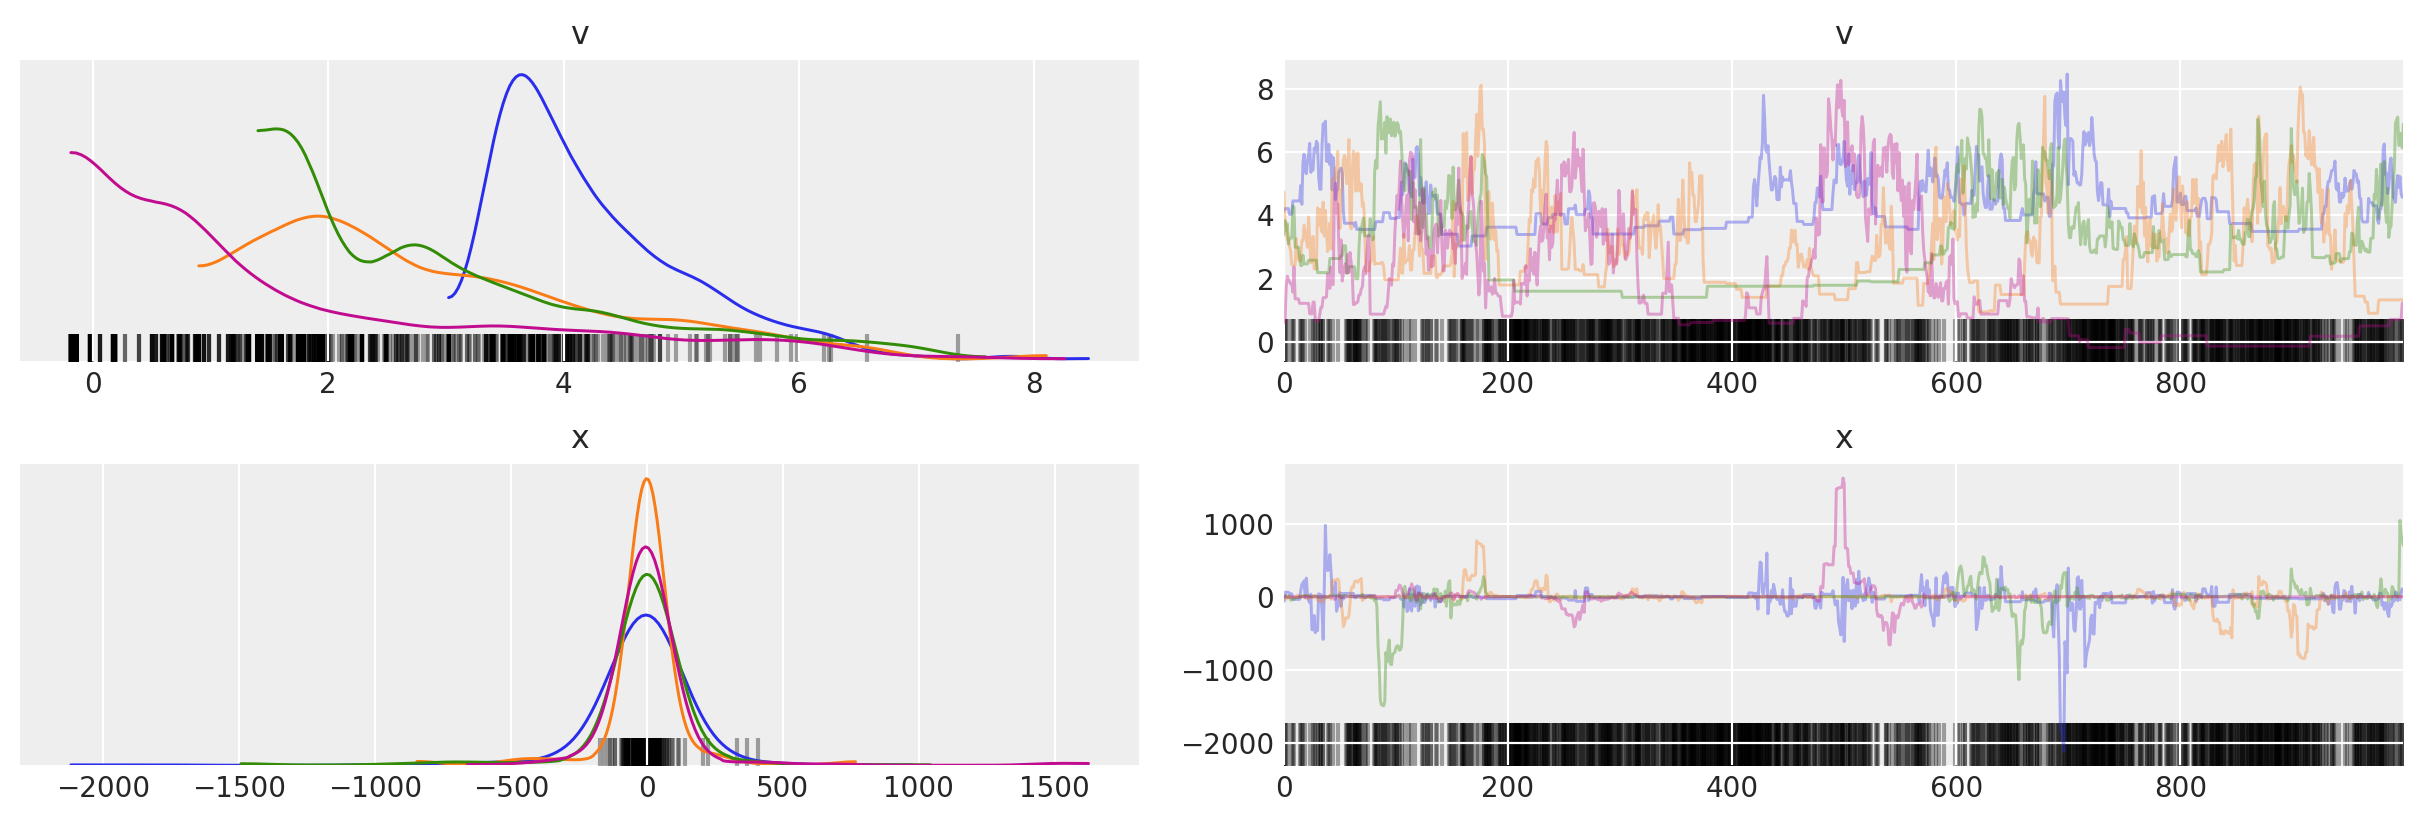

In [29]:
az.plot_trace(idata_13_7);

/Users/alex_andorra/opt/anaconda3/envs/stat-rethink-pymc3/lib/python3.7/site-packages/arviz/plots/pairplot.py:167: UserWarning: fill_last and contour will be deprecated. Please use kde_kwargs
  "fill_last and contour will be deprecated. Please use kde_kwargs", UserWarning,


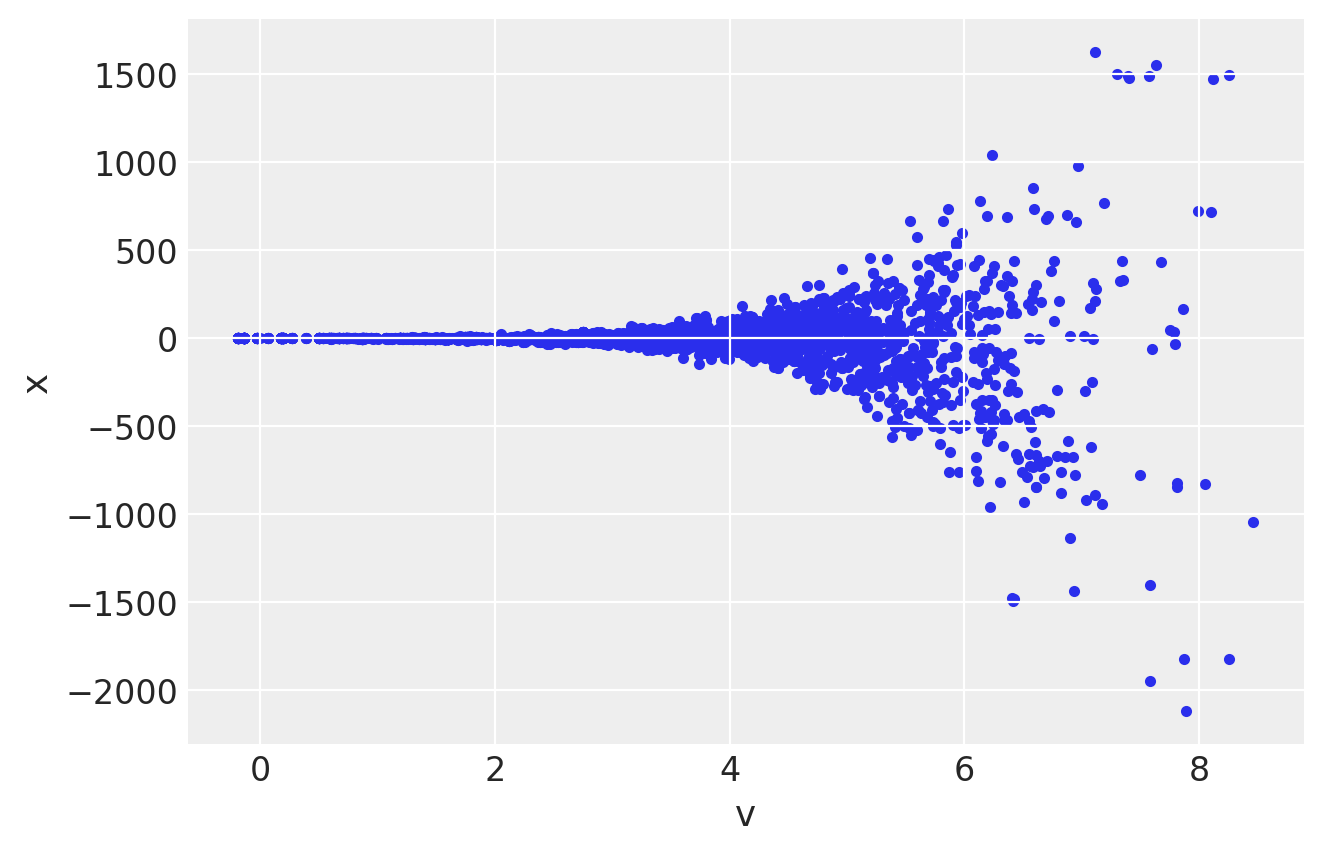

In [30]:
az.plot_pair(idata_13_7, textsize=12);

#### Code 13.27

In [31]:
with pm.Model() as m_13_7nc:
    v = pm.Normal("v", 0.0, 3.0)
    z = pm.Normal("z", 0.0, 1.0)
    x = pm.Deterministic("x", z * pm.math.exp(v))

    trace_13_7nc = pm.sample(random_seed=RANDOM_SEED)
    idata_13_7nc = az.from_pymc3(trace_13_7nc)
az.summary(idata_13_7nc, round_to=2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [z, v]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


,mean,sd,hpd_5.5%,hpd_94.5%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
v,0.04,2.91,-4.50,4.71,0.05,0.05,3512.20,1986.09,3520.09,2816.31,1.0
z,-0.01,1.00,-1.58,1.60,0.02,0.02,3561.88,1796.93,3560.91,2759.12,1.0
x,-8.35,2814.79,-22.99,24.48,34.78,34.20,6549.52,3387.56,2900.48,2969.82,1.0


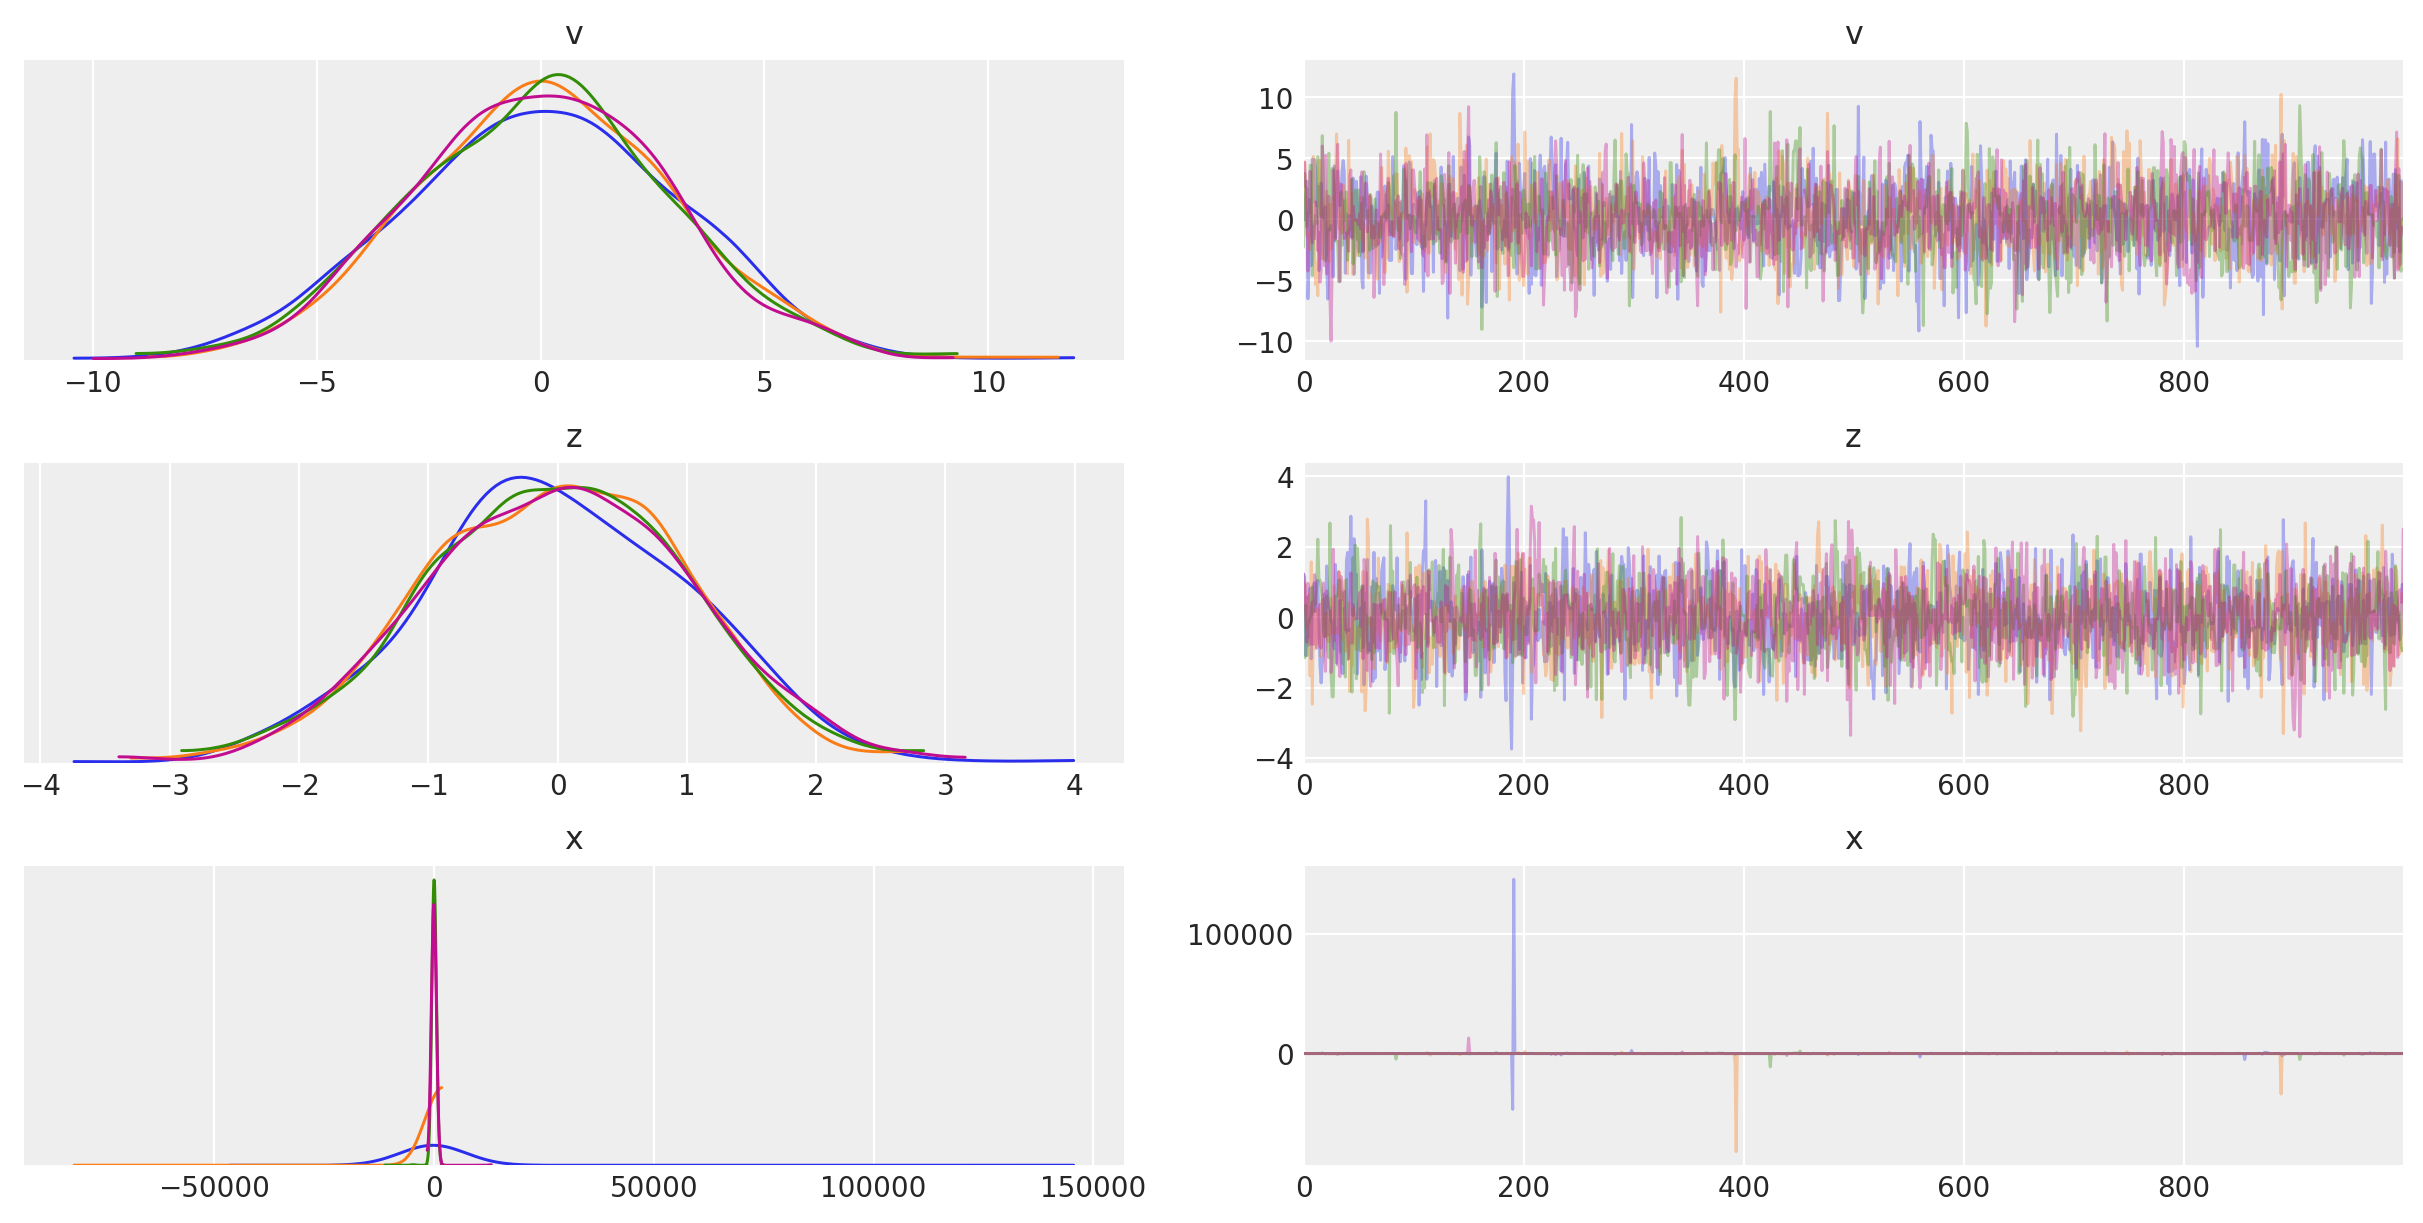

In [32]:
az.plot_trace(idata_13_7nc);

/Users/alex_andorra/opt/anaconda3/envs/stat-rethink-pymc3/lib/python3.7/site-packages/arviz/plots/pairplot.py:167: UserWarning: fill_last and contour will be deprecated. Please use kde_kwargs
  "fill_last and contour will be deprecated. Please use kde_kwargs", UserWarning,


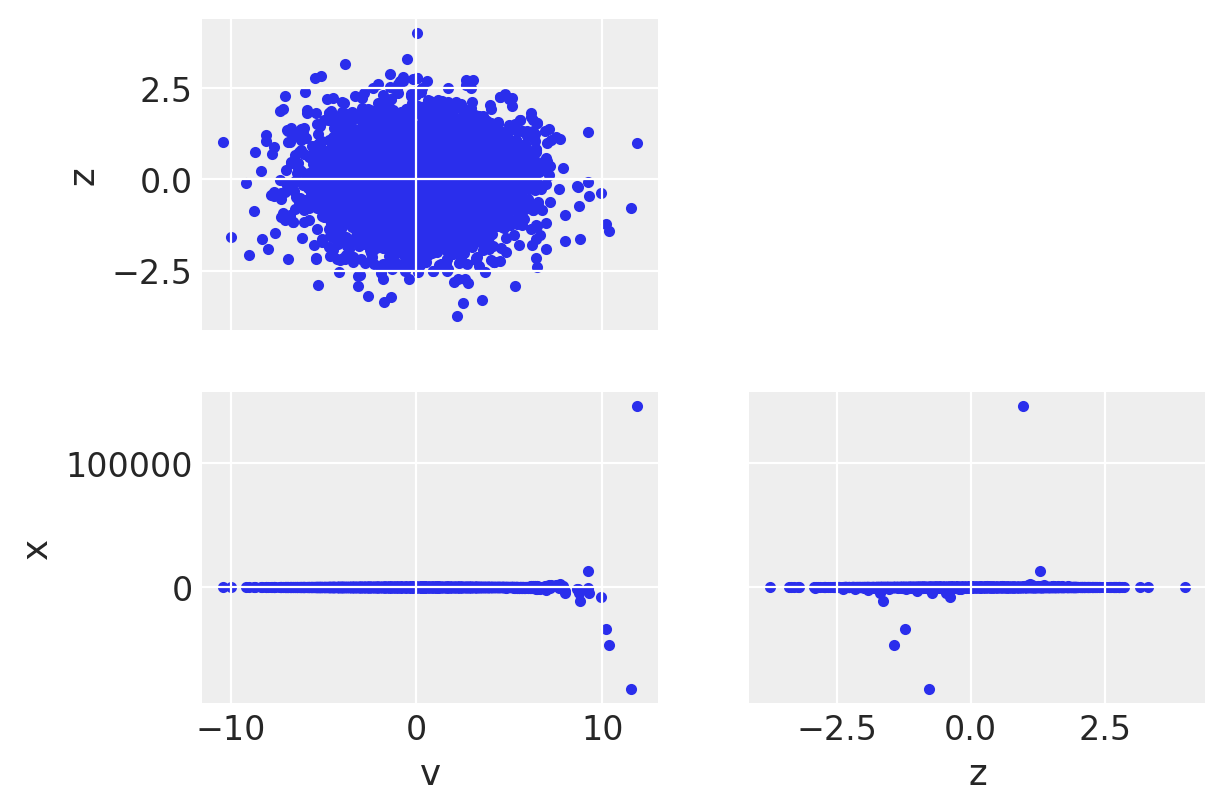

In [33]:
az.plot_pair(idata_13_7nc, textsize=12, figsize=(10, 7));

#### Code 13.28

In [34]:
with m_13_4:
    trace_13_4 = pm.sample(tune=3000, target_accept=0.99, random_seed=RANDOM_SEED)
    idata_13_4 = az.from_pymc3(trace_13_4)
az.summary(idata_13_4, round_to=2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [b, g, a, sigma_g, sigma_a, a_bar]


Sampling 4 chains for 3_000 tune and 1_000 draw iterations (12_000 + 4_000 draws total) took 112 seconds.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 10% for some parameters.


,mean,sd,hpd_5.5%,hpd_94.5%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
a_bar,0.57,0.73,-0.63,1.65,0.02,0.01,1802.53,1356.89,1838.65,2235.24,1.00
a[0],-0.37,0.37,-0.92,0.26,0.01,0.01,920.73,920.73,920.34,1771.34,1.00
a[1],4.67,1.39,2.77,6.45,0.04,0.03,1103.85,884.25,1506.10,1149.55,1.00
a[2],-0.68,0.37,-1.28,-0.10,0.01,0.01,919.48,919.48,918.99,1684.09,1.00
a[3],-0.68,0.37,-1.29,-0.09,0.01,0.01,891.92,891.92,893.48,1556.00,1.00
a[4],-0.37,0.37,-0.99,0.20,0.01,0.01,947.74,947.74,949.05,1777.61,1.00
a[5],0.57,0.37,-0.01,1.18,0.01,0.01,941.65,941.65,940.13,1643.29,1.00
a[6],2.08,0.46,1.31,2.77,0.01,0.01,1248.87,1248.87,1250.34,1940.16,1.00
g[0],-0.16,0.21,-0.51,0.12,0.01,0.01,663.57,663.57,765.79,1626.80,1.00
g[1],0.04,0.17,-0.21,0.35,0.00,0.00,1745.48,854.40,2228.14,1599.47,1.01


#### Code 13.29

In [35]:
with pm.Model() as m_13_4nc:
    a_bar = pm.Normal("a_bar", 0.0, 1.5)
    sigma_a = pm.Exponential("sigma_a", 1.0)
    sigma_g = pm.Exponential("sigma_g", 1.0)

    z = pm.Normal("z", 0.0, 1.0, shape=Nactor)
    x = pm.Normal("x", 0.0, 1.0, shape=Nblock)
    b = pm.Normal("b", 0.0, 0.5, shape=Ntreatments)

    _ = pm.Deterministic("a", a_bar + z * sigma_a)  # actor intercepts
    _ = pm.Deterministic("g", x * sigma_g)  # block intercepts
    p = pm.math.invlogit(a_bar + z[actor] * sigma_a + x[block] * sigma_g + b[treatment])
    pulled_left = pm.Binomial("pulled_left", 1, p, observed=d.pulled_left)

    trace_13_4nc = pm.sample(tune=3000, target_accept=0.9, random_seed=RANDOM_SEED)
    idata_13_4nc = az.from_pymc3(trace_13_4nc)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [b, x, z, sigma_g, sigma_a, a_bar]


Sampling 4 chains for 3_000 tune and 1_000 draw iterations (12_000 + 4_000 draws total) took 31 seconds.


#### Code 13.30

In [36]:
m13_4 = az.summary(idata_13_4, kind="diagnostics", round_to=2)["ess_bulk"]
m13_4.name = "m13_4"

m13_4nc = az.summary(idata_13_4nc, var_names=["~x", "~z"], kind="diagnostics", round_to=2)[
    "ess_bulk"
]
m13_4nc.name = "m13_4nc"

ess_bulk = pd.concat([m13_4, m13_4nc], axis=1, sort=True)

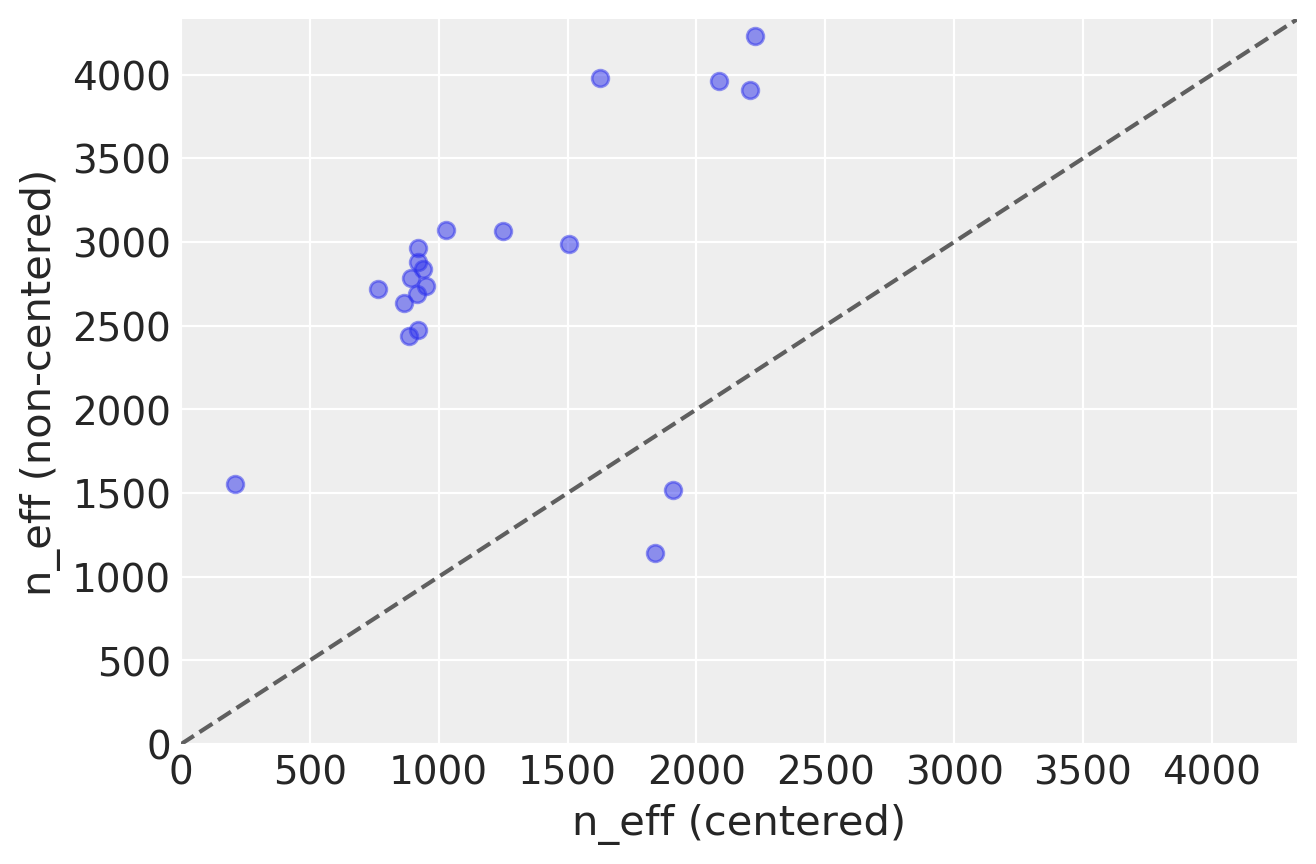

In [37]:
plt.plot(ess_bulk.m13_4.values, ess_bulk.m13_4nc.values, "o", alpha=0.5)

max_val = ess_bulk.m13_4nc.max() + 100
plt.plot(np.arange(max_val), np.arange(max_val), "k--", alpha=0.6)

plt.xlabel("n_eff (centered)")
plt.xlim(0, max_val)

plt.ylabel("n_eff (non-centered)")
plt.ylim(0, max_val);

#### Code 13.31

Before sampling posterior predictive samples, let's redefine the model with shared variables (`pm.Data`), to be able to change them when we'll do posterior predictive checks below:

In [38]:
with pm.Model() as m_13_4:
    a_bar = pm.Normal("a_bar", 0.0, 1.5)
    sigma_a = pm.Exponential("sigma_a", 1.0)
    sigma_g = pm.Exponential("sigma_g", 1.0)

    a = pm.Normal("a", a_bar, sigma_a, shape=Nactor)
    g = pm.Normal("g", 0.0, sigma_g, shape=Nblock)
    b = pm.Normal("b", 0.0, 0.5, shape=Ntreatments)

    actor_ = pm.Data("actor", actor)
    block_ = pm.Data("block", block)
    treatment_ = pm.Data("treatment", treatment)
    p = pm.Deterministic("p", pm.math.invlogit(a[actor_] + g[block_] + b[treatment_]))
    pulled_left = pm.Binomial("pulled_left", 1, p, observed=d.pulled_left)

    trace_13_4 = pm.sample(tune=3000, target_accept=0.99, random_seed=RANDOM_SEED)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [b, g, a, sigma_g, sigma_a, a_bar]


Sampling 4 chains for 3_000 tune and 1_000 draw iterations (12_000 + 4_000 draws total) took 113 seconds.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 10% for some parameters.


In [39]:
chimp = 2
new_data = dict(actor=np.repeat(chimp - 1, 4), block=np.repeat(0, 4), treatment=np.arange(4))

with m_13_4:
    pm.set_data(new_data)
    post_pred_p = pm.sample_posterior_predictive(
        trace_13_4, var_names=["p"], random_seed=RANDOM_SEED
    )["p"]

post_pred_p.mean(0).round(2), az.hpd(post_pred_p).round(2)

/Users/alex_andorra/opt/anaconda3/envs/stat-rethink-pymc3/lib/python3.7/site-packages/arviz/data/base.py:146: UserWarning: More chains (4000) than draws (4). Passed array should have shape (chains, draws, *shape)
  UserWarning,


(array([0.98, 0.99, 0.97, 0.99]),
 array([[0.95, 1.  ],
        [0.97, 1.  ],
        [0.93, 1.  ],
        [0.97, 1.  ]]))

In [40]:
def chimp_pp_plot(hpd_data, mean_data, title):
    _, ax = plt.subplots(1, 1, figsize=(5, 5))
    az.plot_hpd(range(4), hpd_data)
    ax.plot(mean_data)

    ax.set_ylim(0, 1.1)
    ax.set_xlabel("treatment")
    ax.set_ylabel("proportion pulled left")
    ax.set_xticks(range(4), ("R/N", "L/N", "R/P", "L/P"))
    plt.title(title);

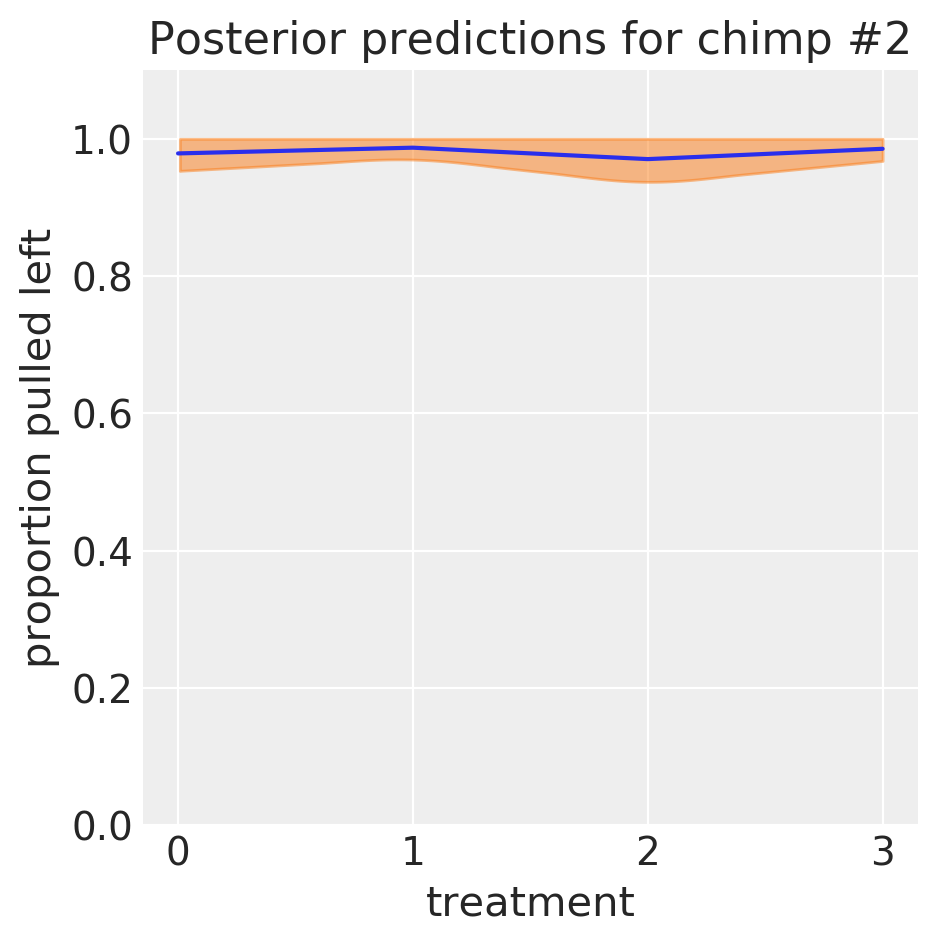

In [41]:
chimp_pp_plot(
    hpd_data=post_pred_p,
    mean_data=post_pred_p.mean(0),
    title=f"Posterior predictions for chimp #{chimp}",
)

#### Code 13.32

In [42]:
post = idata_13_4.posterior.rename_dims(
    {"a_dim_0": "actor", "g_dim_0": "block_id", "b_dim_0": "treatment"}
)
post

<xarray.Dataset>
Dimensions:  (actor: 7, block_id: 6, chain: 4, draw: 1000, treatment: 4)
Coordinates:
  * chain    (chain) int64 0 1 2 3
  * draw     (draw) int64 0 1 2 3 4 5 6 7 8 ... 992 993 994 995 996 997 998 999
    a_dim_0  (actor) int64 0 1 2 3 4 5 6
    g_dim_0  (block_id) int64 0 1 2 3 4 5
    b_dim_0  (treatment) int64 0 1 2 3
Dimensions without coordinates: actor, block_id, treatment
Data variables:
    a_bar    (chain, draw) float64 0.44 0.4718 0.6892 ... 2.199 1.418 0.2977
    a        (chain, draw, actor) float64 0.01955 6.252 -0.5251 ... 1.005 2.346
    g        (chain, draw, block_id) float64 -0.3874 -0.1333 ... 0.08376 0.272
    b        (chain, draw, treatment) float64 -0.05165 0.5962 ... -0.2943
    sigma_a  (chain, draw) float64 1.774 1.689 1.981 3.336 ... 2.335 3.045 1.062
    sigma_g  (chain, draw) float64 0.2173 0.2246 0.6527 ... 0.1854 0.1931 0.2906
Attributes:
    created_at:                 2020-05-18T15:37:47.591223
    arviz_version:              0.7.0
    

In [43]:
post["a"].shape

(4, 1000, 7)

#### Code 13.33

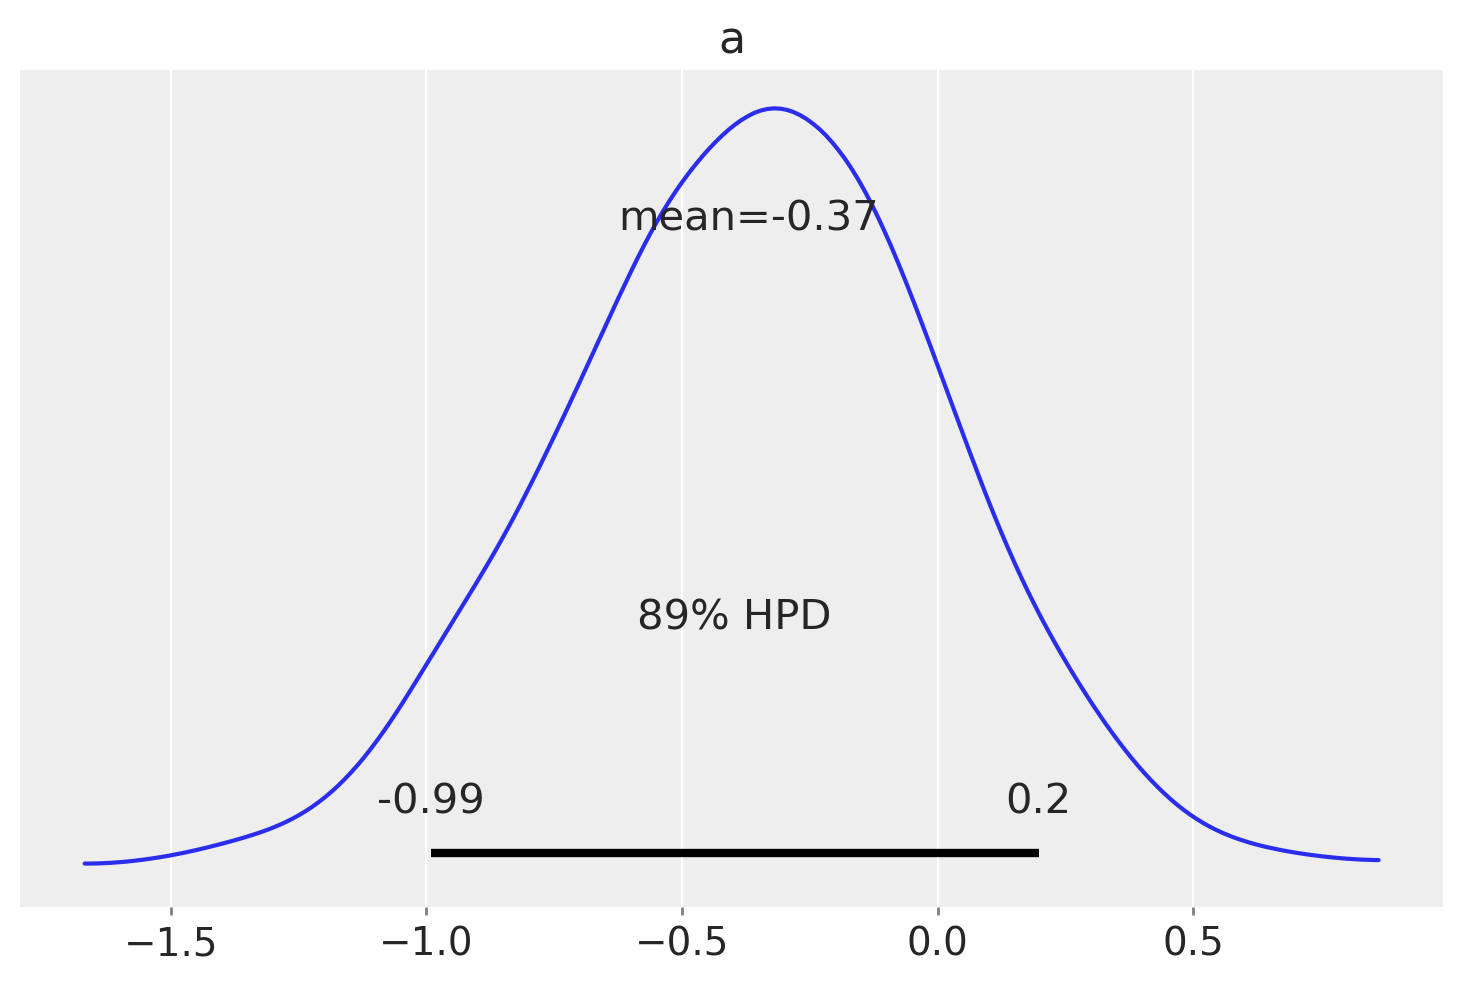

In [44]:
az.plot_posterior(post, var_names=["a"], coords={"actor": 4});

#### Code 13.34

In [45]:
def p_link(actor, block_id):
    logodds = post.sel(actor=actor)["a"] + post.sel(block_id=block_id)["g"] + post["b"]
    return logistic(logodds)

#### Code 13.35

In [46]:
p_raw = p_link(actor=1, block_id=0)
p_raw.mean(dim=("chain", "draw")).data.round(2), az.hpd(p_raw.data).round(2)

(array([0.98, 0.99, 0.97, 0.99]),
 array([[0.95, 1.  ],
        [0.97, 1.  ],
        [0.93, 1.  ],
        [0.97, 1.  ]]))

/Users/alex_andorra/opt/anaconda3/envs/stat-rethink-pymc3/lib/python3.7/site-packages/arviz/data/base.py:146: UserWarning: More chains (4000) than draws (4). Passed array should have shape (chains, draws, *shape)
  UserWarning,


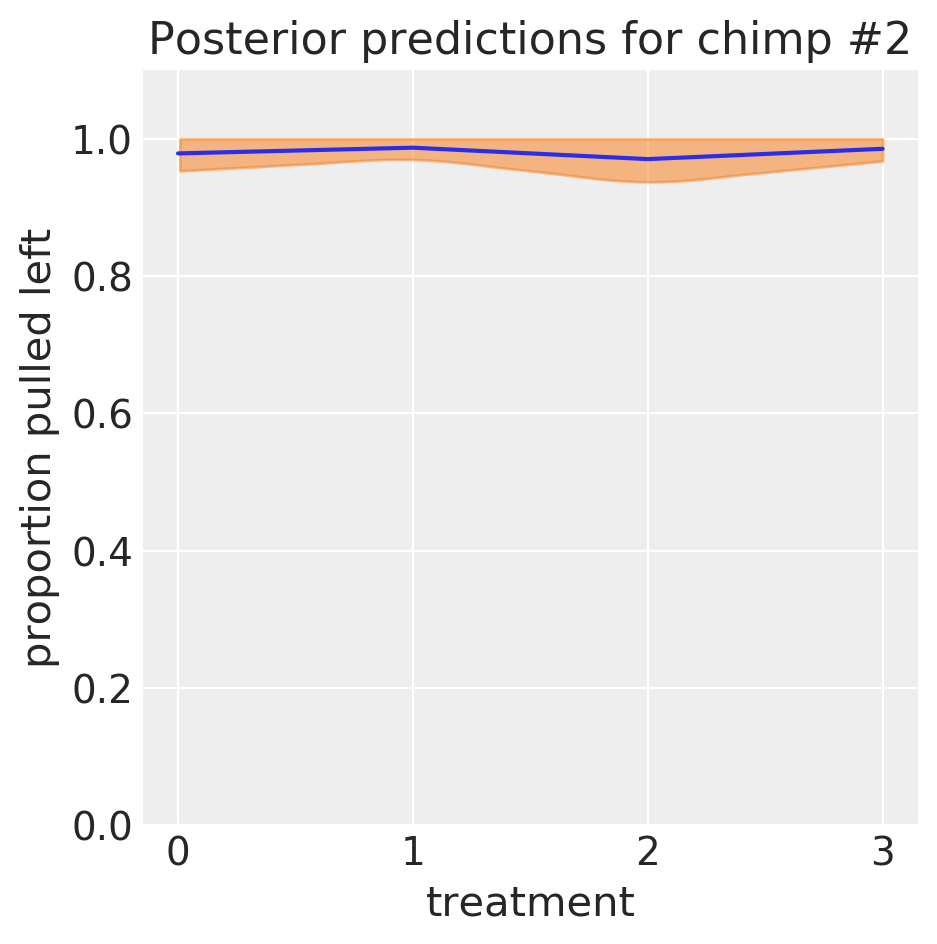

In [47]:
chimp_pp_plot(
    hpd_data=p_raw.data,
    mean_data=p_raw.mean(dim=("chain", "draw")).data,
    title=f"Posterior predictions for chimp #{chimp}",
)

#### Code 13.36

We don't need this function: we'll just add the posterior for `a_bar` and the posterior for `b`, and xarray (which is the format ArviZ uses for its `InferenceData`) will take care of the shape handling for us, even if `post["a_bar"]` and `post["b"]` have different shapes.

#### Code 13.37

/Users/alex_andorra/opt/anaconda3/envs/stat-rethink-pymc3/lib/python3.7/site-packages/arviz/data/base.py:146: UserWarning: More chains (4000) than draws (4). Passed array should have shape (chains, draws, *shape)
  UserWarning,


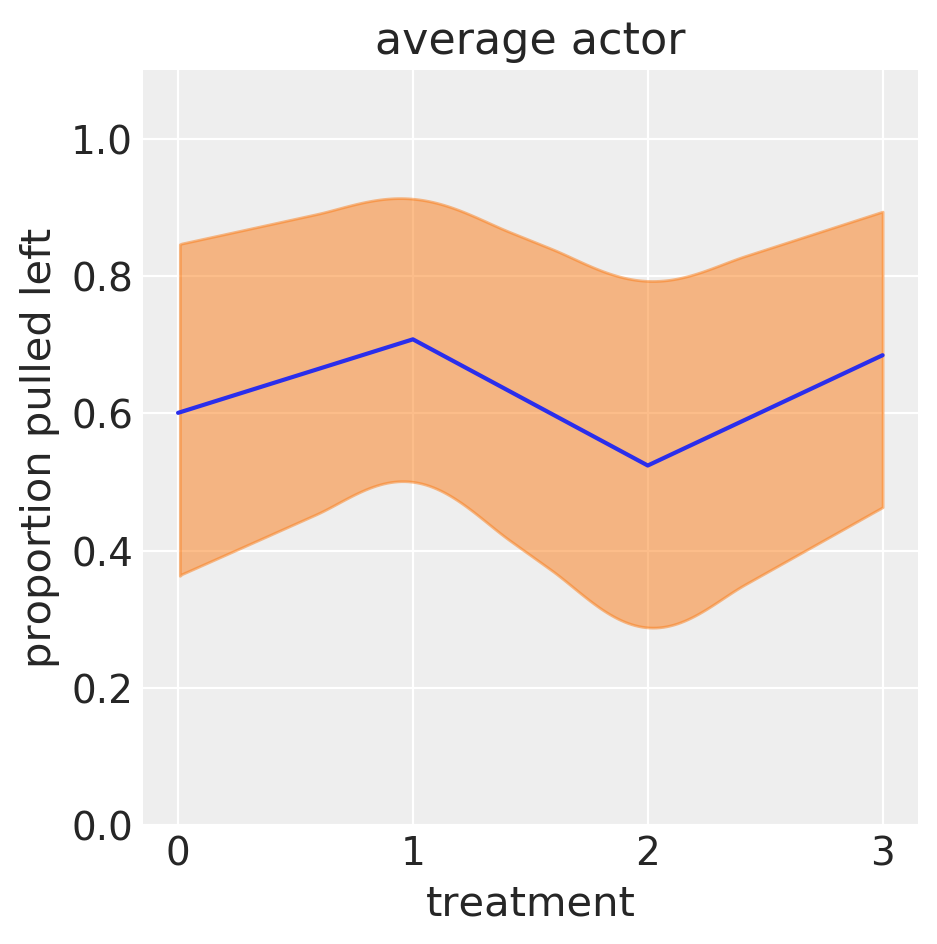

In [48]:
p_raw = logistic(post["a_bar"] + post["b"])

chimp_pp_plot(
    hpd_data=p_raw.data,
    mean_data=p_raw.mean(dim=("chain", "draw")).data,
    title="average actor",
)

#### Code 13.38

/Users/alex_andorra/opt/anaconda3/envs/stat-rethink-pymc3/lib/python3.7/site-packages/arviz/data/base.py:146: UserWarning: More chains (4000) than draws (4). Passed array should have shape (chains, draws, *shape)
  UserWarning,


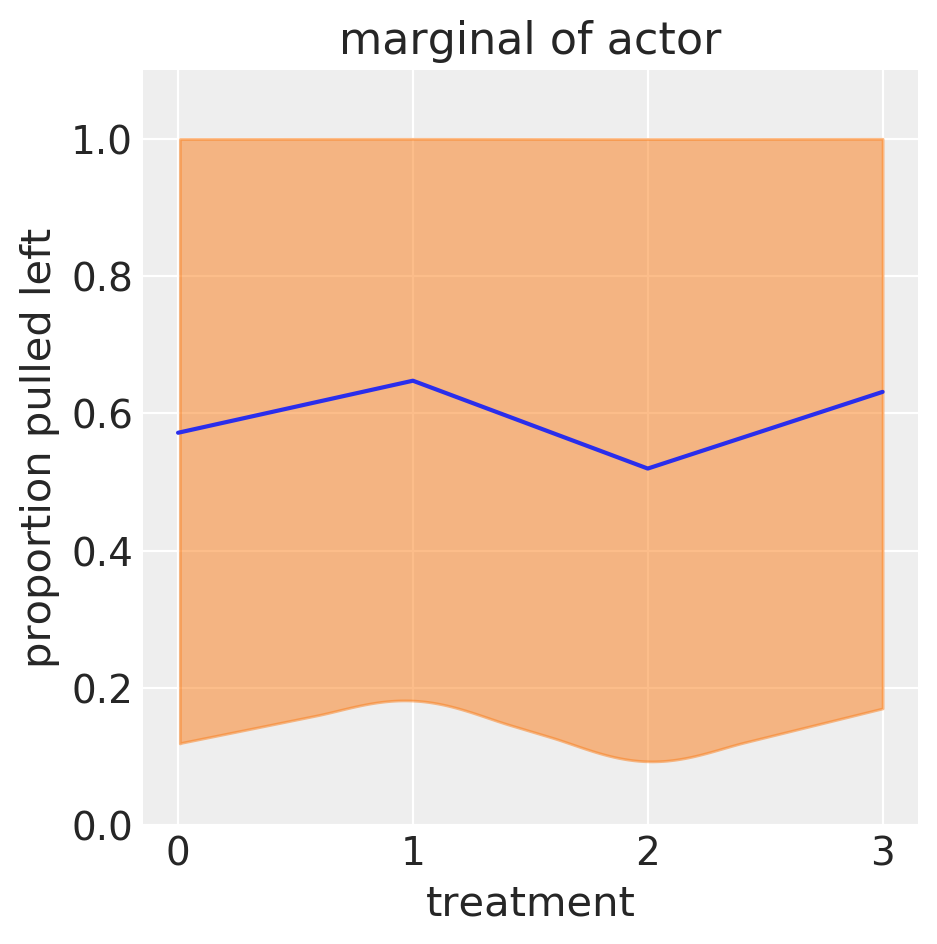

In [49]:
a_sim = np.random.normal(loc=post["a_bar"], scale=post["sigma_a"])
p_raw_asim = logistic(a_sim[:, :, None] + post["b"])

chimp_pp_plot(
    hpd_data=p_raw_asim.data,
    mean_data=p_raw_asim.mean(dim=("chain", "draw")).data,
    title="marginal of actor",
)

#### Code 13.39

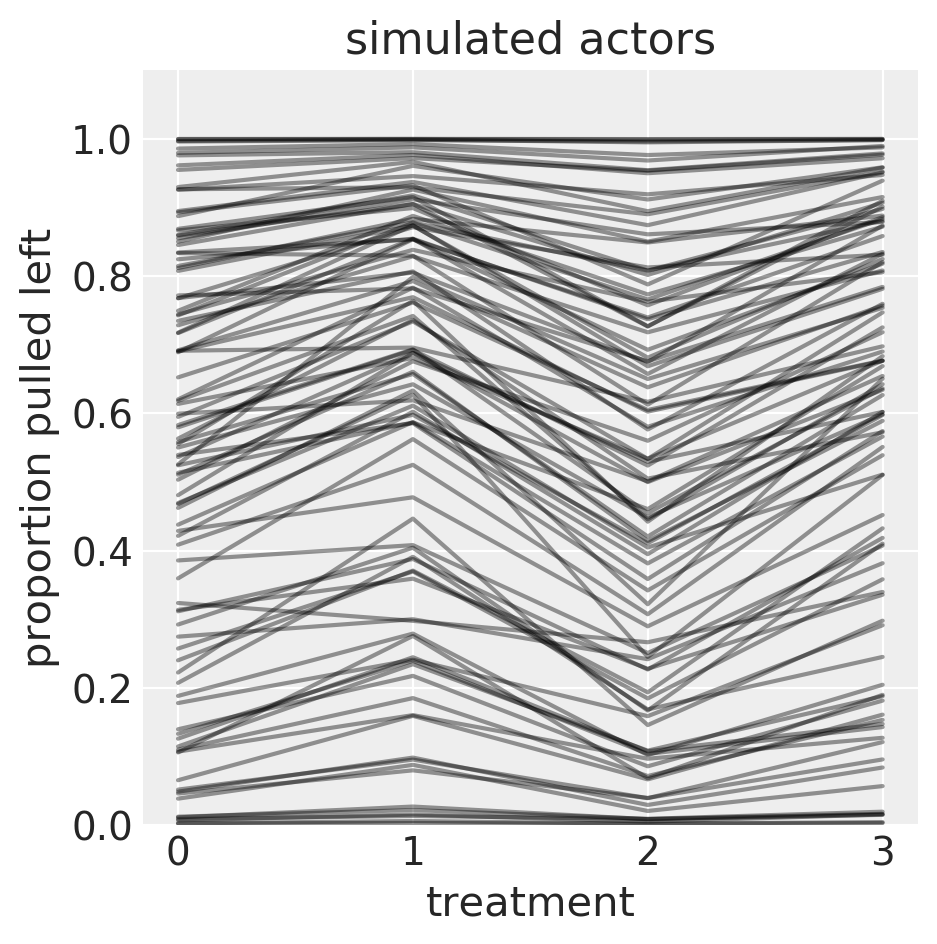

In [50]:
p_raw_asim = p_raw_asim.stack(sample=("chain", "draw"))

_, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot(np.tile(np.arange(4), (100, 1)).T, p_raw_asim[:, :100].data, "k", alpha=0.4)

ax.set_ylim(0, 1.1)
ax.set_xlabel("treatment")
ax.set_ylabel("proportion pulled left")
ax.set_xticks(range(4), ("R/N", "L/N", "R/P", "L/P"))
plt.title("simulated actors");

In [51]:
%load_ext watermark
%watermark -n -u -v -iv -w

scipy      1.4.1
pymc3      3.8
numpy      1.18.1
pandas     0.25.3
arviz      0.7.0
matplotlib 3.1.3
last updated: Mon May 18 2020 

CPython 3.7.6
IPython 7.12.0
watermark 2.0.1
